# plaitpy PoC for diabetes dataset

Using [Diabetes dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for exploring very simple single table mock data use case.

### Requirements

As a **data engineer**, I should be able to specify what is already public to the data scientist and include only that information to the mock dataset.
Let's specify **public data** for diabetes dataset:
* Pregnancies: integer, mean 3.8
* Age: integer, between 18 and 100, gamma distribution
* Outcome: boolean (0, 1), 35% true (1)
* Other columns should be dropped

In [139]:
template = """
define:
      min_age: 18
      max_age: 100

fields:
      Pregnancies:
        random: gauss(3.8, 4)
        finalize: int(max(0, value))
      Age:
        random: gammavariate(2.5, 10)
        finalize: int(min(max($min_age, value), $max_age))
      Outcome:
        mixture:
          - value: 0
            weight: 35
          - value: 1
            weight: 65

        
"""
with open("diabetes/diabetes-template.yaml", 'w') as file:
    file.write(template)


In [140]:
!plait diabetes/diabetes-template.yaml --csv --num 100 > diabetes/generated.csv

import pandas as pd
generated = pd.read_csv("diabetes/generated.csv")
generated.head()

,Pregnancies,Age,Outcome
0,0,45,0
1,8,18,1
2,4,18,1
3,5,18,1
4,0,18,1


In [144]:
import matplotlib.pyplot as plt
def plot_histograms(df, title):
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))

    df['Pregnancies'].plot(kind='hist', bins=10, ax=axs[0])
    axs[0].set_xlabel('Pregnancies')
    axs[0].set_title('Histogram of Pregnancies')

    df['Age'].plot(kind='hist', bins=10, ax=axs[1])
    axs[1].set_xlabel('Age')
    axs[1].set_title('Histogram of Age')

    df['Outcome'].plot(kind='hist', bins=10, ax=axs[2])
    axs[2].set_xlabel('Outcome')
    axs[2].set_title('Histogram of Outcome')

    plt.suptitle(title)
    plt.show()


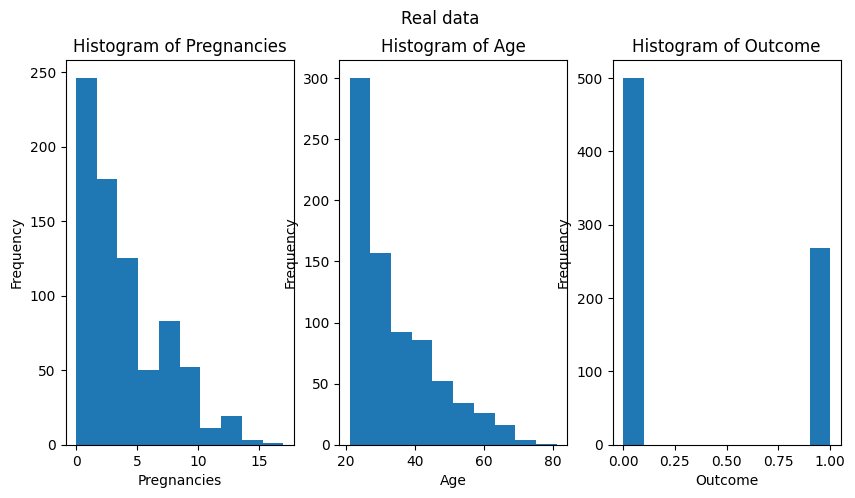

In [142]:
df = pd.read_csv("diabetes/diabetes.csv")
plot_histograms(df, "Real data")

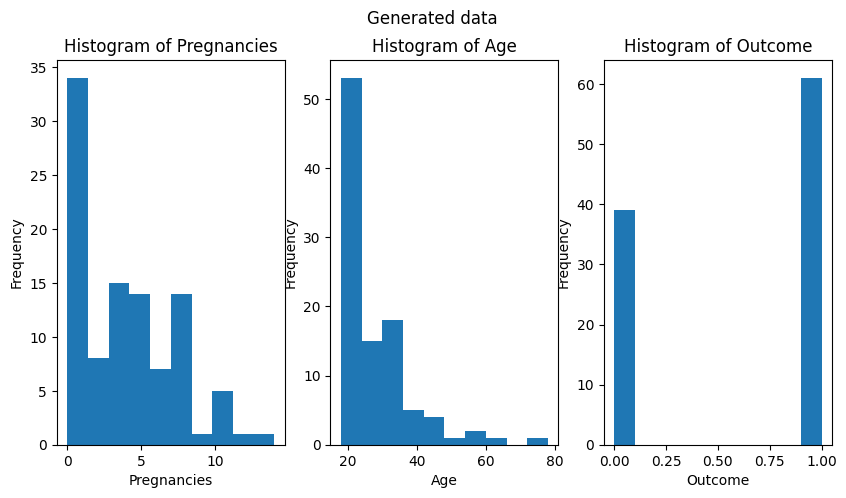

In [143]:
plot_histograms(generated, "Generated data")